In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
sample = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/Q1_label_sample.csv', parse_dates=True, index_col=0)
train_data = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/Q1_train.csv', parse_dates=True, index_col=0)

In [ ]:
train_data.index

클래스 확인

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data["ru_id"])
le.classes_

array(['BaseStationA', 'BaseStationC', 'BaseStationD', 'BaseStationE',
       'BaseStationF', 'BaseStationG', 'BaseStationH', 'BaseStationI'],
      dtype=object)

Radio Unit ID는 학습 자체에 사용되지 않을 것(index와 같은)--추론해야 하는 기지국 B,J는 학습 데이터에 있지도 않음

기지국 ID에 따라 스플릿

In [ ]:
train_A = train_data.loc[train_data["ru_id"]=='BaseStationA']
train_C = train_data.loc[train_data["ru_id"]=='BaseStationC']
train_D = train_data.loc[train_data["ru_id"]=='BaseStationD']
train_E = train_data.loc[train_data["ru_id"]=='BaseStationE']
train_F = train_data.loc[train_data["ru_id"]=='BaseStationF']
train_G = train_data.loc[train_data["ru_id"]=='BaseStationG']
train_H = train_data.loc[train_data["ru_id"]=='BaseStationH']
train_I = train_data.loc[train_data["ru_id"]=='BaseStationI']

In [ ]:
print("A: ",train_A.shape)
print("C: ",train_C.shape)
print("D: ",train_D.shape)
print("E: ",train_E.shape)
print("F: ",train_F.shape)
print("G: ",train_G.shape)
print("H: ",train_H.shape)
print("I: ",train_I.shape)

A:  (17181, 38)
C:  (17181, 38)
D:  (17181, 38)
E:  (17180, 38)
F:  (17180, 38)
G:  (17180, 38)
H:  (17181, 38)
I:  (17181, 38)


uenomax 값 범위 분석

데이터 시각화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

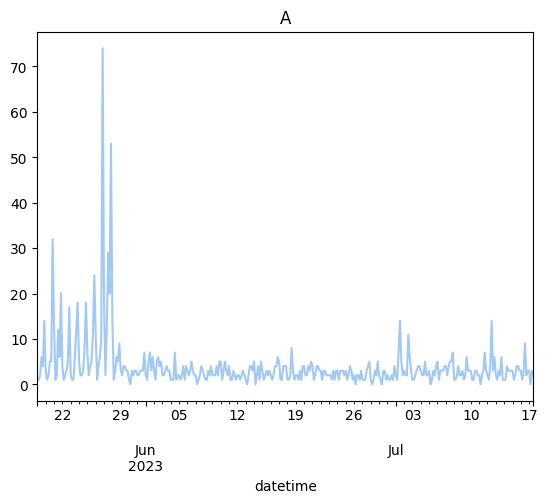

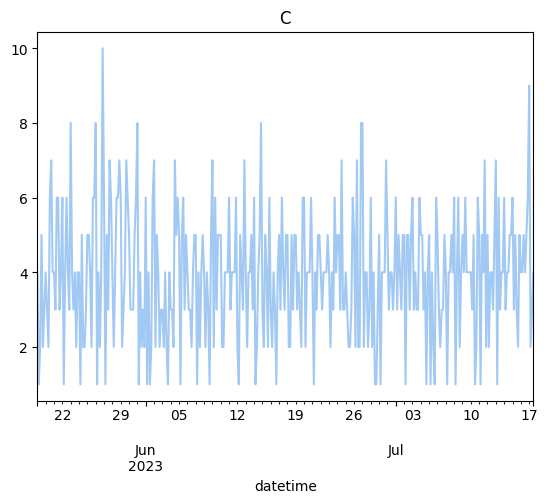

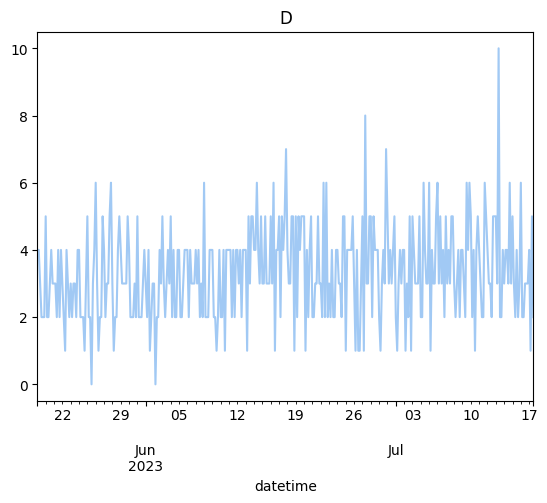

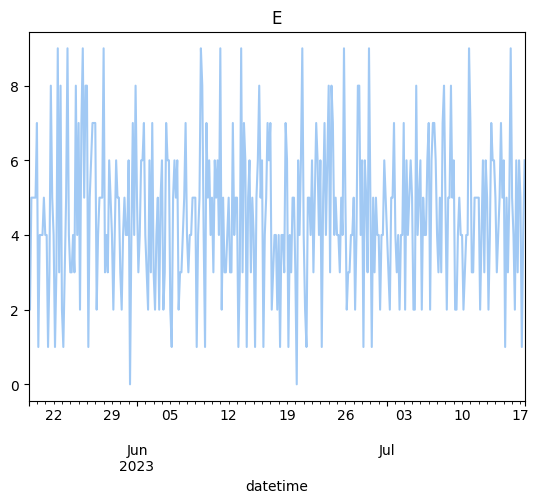

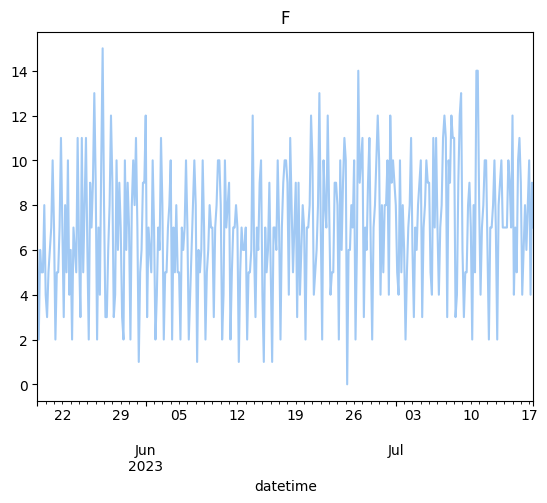

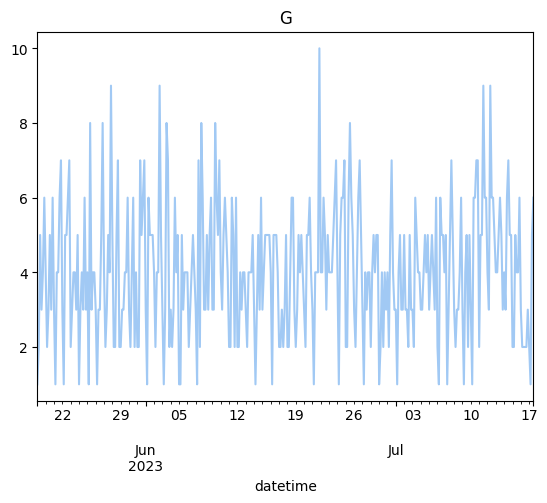

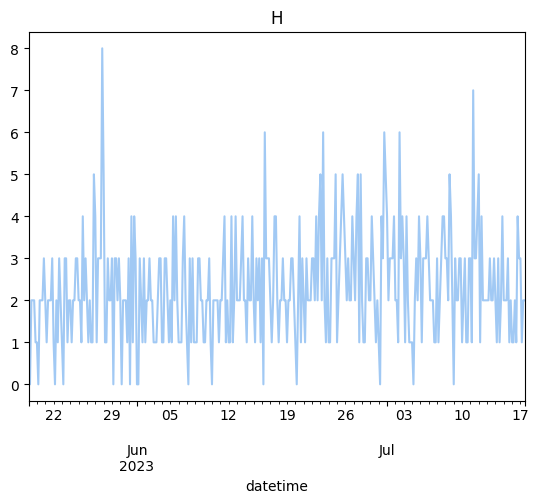

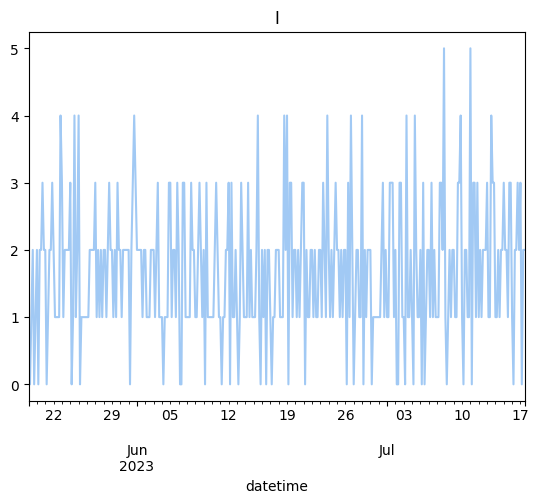

In [ ]:
train_A["uenomax"].asfreq("4H").plot()
plt.title('A')
plt.show()
train_C["uenomax"].asfreq("4H").plot()
plt.title('C')
plt.show()
train_D["uenomax"].asfreq("4H").plot()
plt.title('D')
plt.show()
train_E["uenomax"].asfreq("4H").plot()
plt.title('E')
plt.show()
train_F["uenomax"].asfreq("4H").plot()
plt.title('F')
plt.show()
train_G["uenomax"].asfreq("4H").plot()
plt.title('G')
plt.show()
train_H["uenomax"].asfreq("4H").plot()
plt.title('H')
plt.show()
train_I["uenomax"].asfreq("4H").plot()
plt.title('I')
plt.show()

<Axes: xlabel='datetime', ylabel='uenomax'>

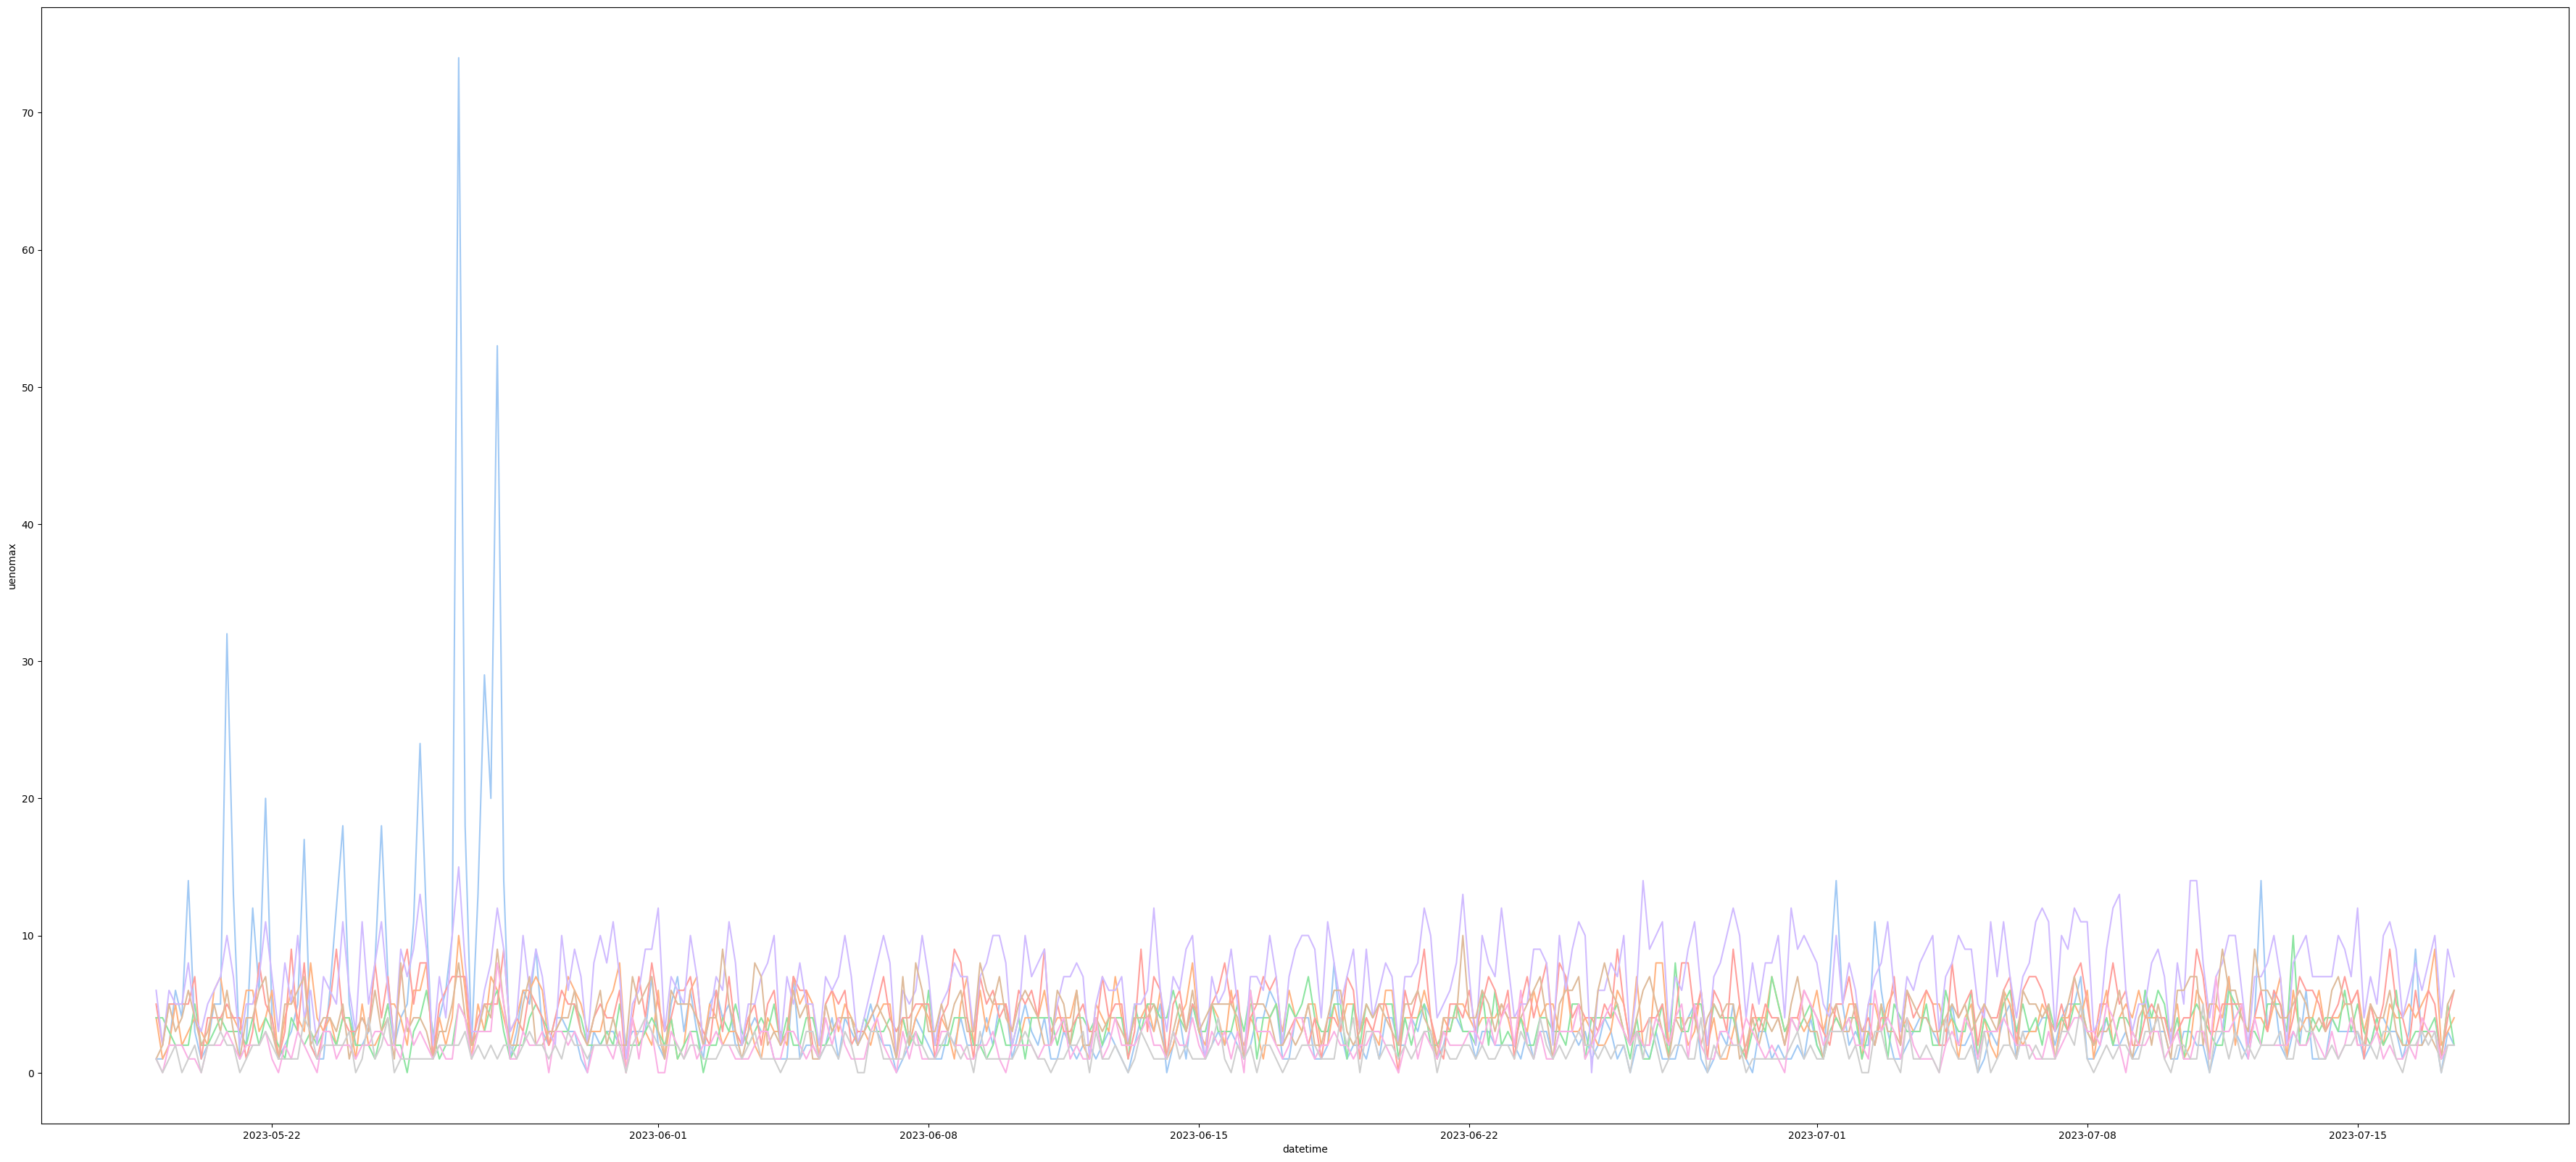

In [16]:
plt.figure(figsize=(45,20))
sns.set_palette("pastel")
sns.lineplot(data=train_A["uenomax"].asfreq('4H'))
sns.lineplot(data=train_C["uenomax"].asfreq('4H'))
sns.lineplot(data=train_D["uenomax"].asfreq('4H'))
sns.lineplot(data=train_E["uenomax"].asfreq('4H'))
sns.lineplot(data=train_F["uenomax"].asfreq('4H'))
sns.lineplot(data=train_G["uenomax"].asfreq('4H'))
sns.lineplot(data=train_H["uenomax"].asfreq('4H'))
sns.lineplot(data=train_I["uenomax"].asfreq('4H'))

In [ ]:
train_A.to_csv('training_A.csv')
train_C.to_csv('training_C.csv')
train_D.to_csv('training_D.csv')
train_E.to_csv('training_E.csv')
train_F.to_csv('training_F.csv')
train_G.to_csv('training_G.csv')
train_H.to_csv('training_H.csv')
train_I.to_csv('training_I.csv')

기지국별로 다른 CSV파일로 저장

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/Q1_train.csv', parse_dates=True, index_col=0)
train_data.info()

In [31]:
import pandas as pd
train_A = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_A.csv', parse_dates=True, index_col=0)  #결측치 없음 17181
train_C = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_C.csv', parse_dates=True, index_col=0)  #결측치 없음 17181
train_D = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_D.csv', parse_dates=True, index_col=0)  #결측치 없음 17181
train_E = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_E.csv', parse_dates=True, index_col=0)  #결측치 있음 17180
train_F = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_F.csv', parse_dates=True, index_col=0)  #결측치 있음 17180
train_G = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_G.csv', parse_dates=True, index_col=0)  #결측치 있음 17180
train_H = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_H.csv', parse_dates=True, index_col=0)  #결측치 없음 17181
train_I = pd.read_csv('/content/drive/MyDrive/dataset/aifactory/training_I.csv', parse_dates=True, index_col=0)  #결측치 없음 17181

결측치 처리

In [25]:
train_E = train_E.fillna(method='ffill', axis = 1)
train_F = train_F.fillna(method='ffill', axis = 1)
train_G = train_G.fillna(method='ffill', axis = 1)

In [27]:
train_E.to_csv('training_E.csv')
train_F.to_csv('training_F.csv')
train_G.to_csv('training_G.csv')

In [ ]:
X = train_data.drop(['uenomax'],axis=1)

In [ ]:
Y = train_data[["uenomax"]]

In [ ]:
train_data.shape

(137445, 39)

In [ ]:
X.shape, Y.shape

((137445, 38), (137445, 1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((123700, 38), (13745, 38), (123700, 1), (13745, 1))